In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('clean_data/clean_data.csv')

In [3]:
df = df.drop(['Location', 'Highest Education', 'Gender', 'Age'], axis=1)

In [4]:
def convert(x):
    if x == 'Yes':
        return 1
    else:
        return 0

df3 = df.applymap(convert)

In [5]:
a = df3.groupby('Opportunity Equality').sum()
b = df3.groupby('Traditional Views Barrier').sum()
c = df3.groupby('Pay Equality').sum()
d = df3.groupby('Government Support').sum()
e = df3.groupby('Education Helps').sum()
f = df3.groupby('Maternity Support Helps').sum()
g = df3.groupby('Banking Access Helps').sum()
h = df3.groupby('Other Things Helps').sum()
i = df3.groupby('Fear Of Violence Barrier').sum()
j = df3.groupby('Housework Barrier').sum()
k = df3.groupby('Laws Against Working Barrier').sum()
l = df3.groupby('Lack Of Experience Barrier').sum()
m = df3.groupby('Lack Of Internet Barrier').sum()
n = df3.groupby('Family Planning Helps').sum()
o = df3.groupby('Minimum Wage Helps').sum()
p = df3.groupby('Rolemodels Help').sum()

In [7]:
def networkizer(x):
    name = x.index.name
    x = x.drop(0)
    x = x.reset_index()
    # fix this
    x = x.transpose()
    x.columns = [name]
    return x

In [8]:
a1 = networkizer(a)
b1 = networkizer(b)
c1 = networkizer(c)
d1 = networkizer(d)
e1 = networkizer(e)
f1 = networkizer(f)
g1 = networkizer(g)
h1 = networkizer(h)
i1 = networkizer(i)
j1 = networkizer(j)
k1 = networkizer(k)
l1 = networkizer(l)
m1 = networkizer(m)
n1 = networkizer(n)
o1 = networkizer(o)
p1 = networkizer(p)

In [9]:
# df_network = pd.concat([a1, b1, c1, d1, e1, f1, g1, h1, i1, j1, k1, l1, m1, n1], axis=1, join='inner')
df_network = pd.concat([a1, b1, c1, d1, e1, f1, g1, h1, i1, j1, k1, l1, m1, n1, o1, p1], axis=1, join='outer')

In [10]:
df_network = df_network.sort_index(axis=1).sort_index(axis=0)

In [11]:
df_network = df_network.fillna(0)

integerize = lambda x:int(x)
df_network = df_network.applymap(integerize)

In [12]:
df_network.to_csv('clean_data/comparisons.csv', index=False)

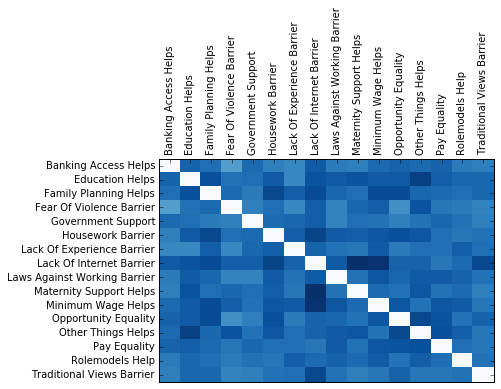

In [13]:
import matplotlib.pyplot as plt
import numpy as np
column_labels = list(df_network.columns)
row_labels = list(df_network.index)
data = df_network.as_matrix()
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()
plt.xticks(rotation=90)

ax.grid(False)

# Turn off all the ticks
ax = plt.gca()


ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show()